In [377]:
%matplotlib inline

In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
def object_to_float(dataset, column):
    dataset[column] = (
    dataset[column]
    .astype(str)
    .str.replace(",", "", regex=True)
    .apply(pd.to_numeric, errors='coerce')
)

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [380]:
spotify_data = pd.read_csv("data/spotify_most_streamed_2024.zip", encoding="unicode_escape")
spotify_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725,"390,470,936","30,716","196,631,588",...,684,62,"17,598,718",114,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,546,"323,703,884","28,113","174,597,137",...,3,67,"10,422,430",111,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538,"601,309,283","54,331","211,607,669",...,536,136,"36,321,847",172,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,445,"2,031,280,633","269,802","136,569,078",...,"2,182",264,"24,684,248",210,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423,"107,034,922","7,223","151,469,874",...,1,82,"17,660,624",105,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19,"305,049,963","65,770","5,103,054",...,NaN,2,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19,"52,282,360","4,602","1,449,767",...,NaN,1,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19,"189,972,685","72,066","6,704,802",...,NaN,1,74,6,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7,"6,817,840",NaN,NaN,"448,292",NaN,0


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [381]:
spotify_data.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [382]:
spotify_dataset = spotify_data

In [383]:
spotify_dataset.columns = spotify_dataset.columns.to_series().apply(lambda name: name.strip().lower().replace(" ", "_"))
spotify_dataset.columns.unique()

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [384]:
spotify_dataset.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

In [385]:
top_five_artist = spotify_dataset["artist"].value_counts().head(5)
top_five_artist

artist
Taylor Swift    63
Drake           63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64

In [386]:
top_five_artist = spotify_dataset["artist"].value_counts().head(5)
top_five_artist

artist
Taylor Swift    63
Drake           63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64

In [387]:
explicit_artists = spotify_dataset[spotify_dataset["explicit_track"] == 1]["artist"].unique()
clean_artists = spotify_dataset[~spotify_dataset["artist"].isin(explicit_artists)]
clean_artists = clean_artists["artist"].value_counts().head(5)
clean_artists


artist
Imagine Dragons    16
BTS                14
Luke Combs         13
Linkin Park        13
Harry Styles       12
Name: count, dtype: int64

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

##### convert everything to text 
##### 1.We turn everything into text
##### 2.Remove commas
##### 3.Try to make it float, failures become NaN
##### 4.Sums by artists, ignoring NaN
##### 5.We sort the Top 5 artists with the most streams

In [388]:
spotify_dataset["spotify_streams"] = (
    spotify_dataset["spotify_streams"]
    .astype(str)
    .str.replace(",", "", regex=True)
    .apply(pd.to_numeric, errors='coerce')
)


In [389]:
artist_streams = spotify_dataset.groupby("artist")["spotify_streams"].sum()

top_five_artists = artist_streams.sort_values(ascending=False).head(5)
top_five_artists_formatted = top_five_artists.apply(lambda x: "{:,.0f}".format(x))
top_five_artists_formatted

artist
Bad Bunny       37,054,834,425
The Weeknd      36,948,540,278
Drake           34,962,157,577
Taylor Swift    34,470,771,165
Post Malone     26,137,472,958
Name: spotify_streams, dtype: object

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [390]:
spotify_dataset.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

In [391]:
spotify_dataset[["track","release_date"]]

,track,release_date
0,MILLION DOLLAR BABY,4/26/2024
1,Not Like Us,5/4/2024
2,i like the way you kiss me,3/19/2024
3,Flowers,1/12/2023
4,Houdini,5/31/2024
...,...,...
4595,For the Last Time,9/5/2017
4596,Dil Meri Na Sune,7/27/2018
4597,Grace (feat. 42 Dugg),2/28/2020
4598,Nashe Si Chadh Gayi,11/8/2016


In [392]:
spotify_dataset["release_date"] = pd.to_datetime(spotify_dataset["release_date"], format="%m/%d/%Y", errors='coerce')


In [393]:
spotify_dataset["release_year"] = spotify_dataset["release_date"].dt.year
spotify_dataset["release_month"] = spotify_dataset["release_date"].dt.month

In [394]:
spotify_dataset["release_month"]

0        4
1        5
2        3
3        1
4        5
        ..
4595     9
4596     7
4597     2
4598    11
4599     4
Name: release_month, Length: 4600, dtype: int32

In [395]:
top_release_year = spotify_dataset["release_year"].value_counts().sort_values(ascending=False)
top_release_year

release_year
2023    1158
2022     694
2024     693
2021     408
2020     360
2019     296
2018     249
2017     213
2016     123
2015      96
2014      70
2013      55
2011      51
2012      47
2010      27
2009      15
2008      11
2005       5
2002       5
2004       5
2007       5
2003       3
2006       3
2000       2
1994       1
1999       1
1987       1
1998       1
2001       1
1991       1
Name: count, dtype: int64

In [396]:
songs_2024 = len(spotify_dataset[spotify_dataset["release_year"] == 2024])
songs_2024

693

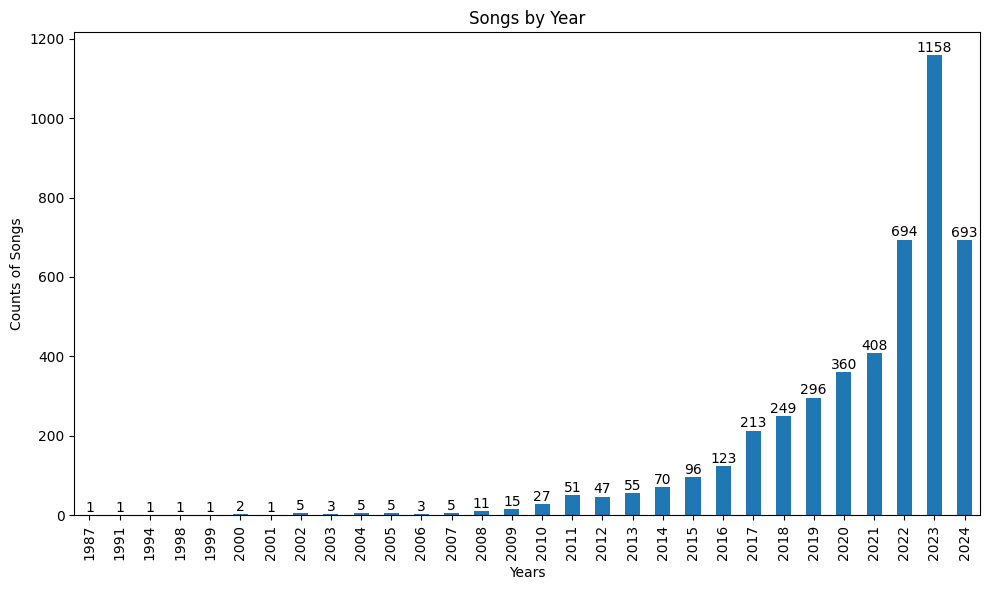

In [397]:
year_counts = spotify_dataset["release_year"].value_counts().sort_index()

ax = year_counts.plot(kind="bar", title="Songs by Year", figsize=(10,6))
plt.xlabel("Years")
plt.ylabel("Counts of Songs")

for i, value in enumerate(year_counts):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [398]:
spotify_dataset["release_month"].value_counts().sort_values(ascending=False)

release_month
5     511
1     503
3     430
4     420
6     395
10    384
2     371
11    350
9     328
7     321
8     315
12    272
Name: count, dtype: int64

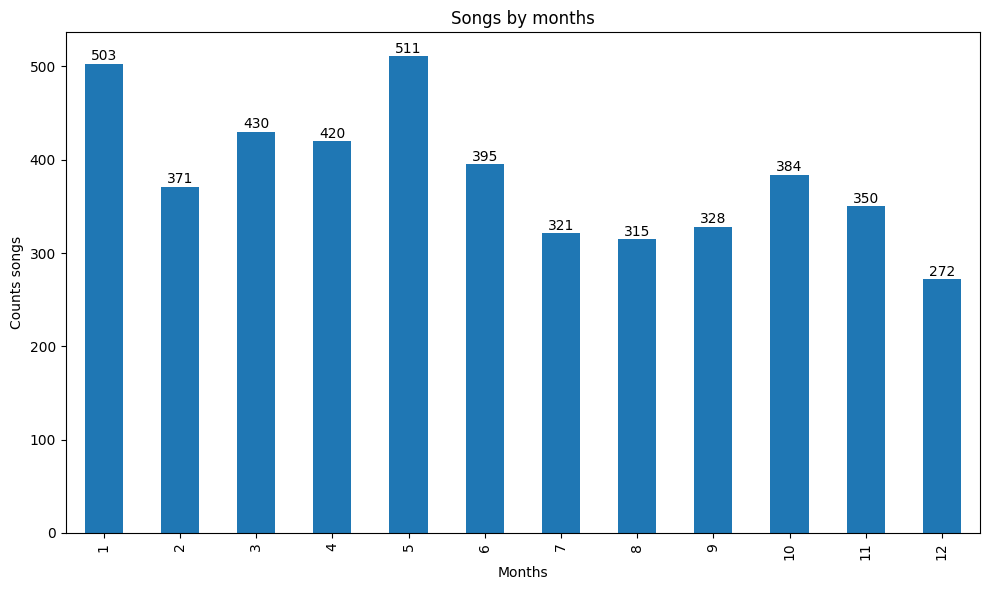

In [399]:
monthly_counts = spotify_dataset["release_month"].value_counts().sort_index()
ax = monthly_counts.plot(kind="bar", title="Songs by months", figsize=(10,6))
plt.xlabel("Months")
plt.ylabel("Counts songs")

for i, value in enumerate(monthly_counts):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

##### 1. We notice that one of the columns we will work with is an object and convert it to a float.
##### 2. We create a new table with the given songs and the four possible playlists.
##### 3. We sort the table and remove the song that has nAn. This means that it has not been added to any list and we are not looking for that.
##### 4. We make a correlation.

In [400]:
spotify_data["spotify_playlist_count"].dtype

dtype('O')

In [401]:
# spotify_data["spotify_playlist_count"] = (
#     spotify_data["spotify_playlist_count"]
#     .astype(str)
#     .str.replace(",", "", regex=True)
#     .astype(float)
# )
object_to_float(spotify_data, "spotify_playlist_count")

In [402]:
playlist_cols = spotify_data[["track", "spotify_playlist_count", "apple_music_playlist_count", "deezer_playlist_count", "amazon_playlist_count"]]
playlist_cols

,track,spotify_playlist_count,apple_music_playlist_count,deezer_playlist_count,amazon_playlist_count
0,MILLION DOLLAR BABY,"30,716",210,62,114
1,Not Like Us,"28,113",188,67,111
2,i like the way you kiss me,"54,331",190,136,172
3,Flowers,"269,802",394,264,210
4,Houdini,"7,223",182,82,105
...,...,...,...,...,...
4595,For the Last Time,"65,770",3,2,NaN
4596,Dil Meri Na Sune,"4,602",1,1,NaN
4597,Grace (feat. 42 Dugg),"72,066",19,1,6
4598,Nashe Si Chadh Gayi,"14,037",1,NaN,7


In [403]:
playlist_data = playlist_cols.dropna()

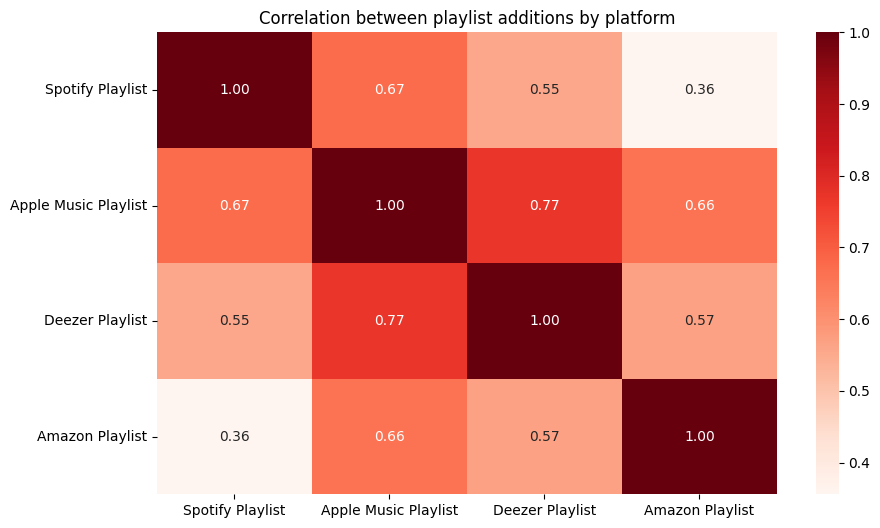

In [404]:
correlation_matrix = playlist_data[
    ["spotify_playlist_count", "apple_music_playlist_count", "deezer_playlist_count", "amazon_playlist_count"]
].corr()
correlation_matrix.columns = ["Spotify Playlist", "Apple Music Playlist", "Deezer Playlist", "Amazon Playlist"]
correlation_matrix.index = ["Spotify Playlist", "Apple Music Playlist", "Deezer Playlist", "Amazon Playlist"]

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Reds", fmt=".2f")
plt.title("Correlation between playlist additions by platform")
plt.show()

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

In [405]:
spotify_dataset[["youtube_views","youtube_likes"]].dtypes

youtube_views    object
youtube_likes    object
dtype: object

In [406]:
# spotify_dataset["youtube_views"] = (
#     spotify_dataset["youtube_views"]
#     .astype(str)
#     .str.replace(",", "", regex=True)
#     .apply(pd.to_numeric, errors='coerce')
# )

# spotify_dataset["youtube_likes"] = (
#     spotify_dataset["youtube_likes"]
#     .astype(str)
#     .str.replace(",", "", regex=True)
#     .apply(pd.to_numeric, errors='coerce')
# )
object_to_float(spotify_dataset, "youtube_views")
object_to_float(spotify_dataset, "youtube_likes")
pd.set_option('display.float_format', '{:,.0f}'.format)

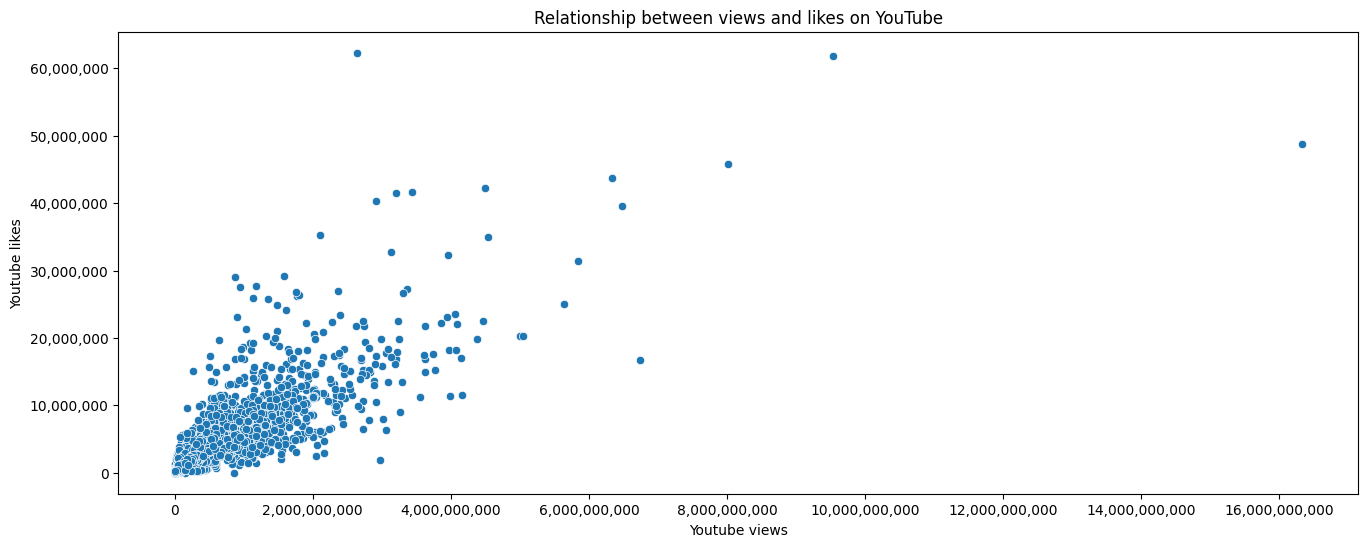

In [407]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=spotify_dataset, x="youtube_views", y="youtube_likes")

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))

plt.title("Relationship between views and likes on YouTube")
plt.xlabel("Youtube views")
plt.ylabel("Youtube likes")
# plt.xlim(0, 1e10)
# plt.ylim(0, 1e8)

plt.show()

In [408]:
yt_ratio_data = spotify_dataset["youtube_views"] / spotify_dataset["youtube_likes"]
yt_ratio_data = yt_ratio_data.replace([np.inf, -np.inf], np.nan)
yt_ratio_data = yt_ratio_data.dropna()
yt_ratio_data = yt_ratio_data[yt_ratio_data > 0]
mean_ratio = yt_ratio_data.mean()
mean_ratio

np.float64(169.1161131790719)

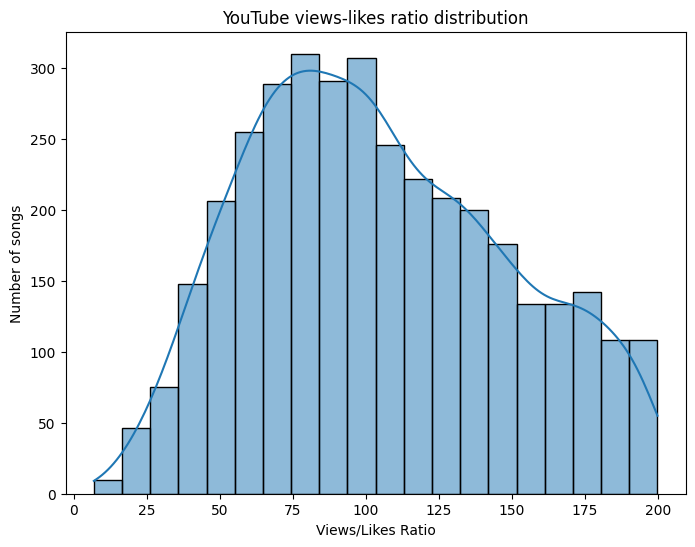

In [409]:
plt.figure(figsize=(8, 6))
sns.histplot(yt_ratio_data[yt_ratio_data < 200], bins=20, kde=True)
plt.title("YouTube views-likes ratio distribution")
plt.xlabel("Views/Likes Ratio")
plt.ylabel("Number of songs")
plt.show()

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

In [410]:
spotify_dataset[["track", "release_year", "tiktok_views"]].dtypes

track           object
release_year     int32
tiktok_views    object
dtype: object

In [411]:
object_to_float(spotify_dataset, "tiktok_views")

In [412]:
spotify_dataset_clean = spotify_dataset.dropna(subset=["tiktok_views"])

In [413]:
spotify_dataset_clean[["track", "release_year","tiktok_views"]]

,track,release_year,tiktok_views
0,MILLION DOLLAR BABY,2024,"5,332,281,936"
1,Not Like Us,2024,"208,339,025"
2,i like the way you kiss me,2024,"3,369,120,610"
3,Flowers,2023,"14,603,725,994"
5,Lovin On Me,2023,"2,938,686,633"
...,...,...,...
4595,For the Last Time,2017,"143,934,379"
4596,Dil Meri Na Sune,2018,"19,935"
4597,Grace (feat. 42 Dugg),2020,"36,849,005"
4598,Nashe Si Chadh Gayi,2016,"37,757,301"


In [414]:
tiktok_after_2016 = spotify_dataset_clean[spotify_dataset_clean["release_year"] >= 2016]
top_tiktok = tiktok_after_2016[["track", "release_year","tiktok_views"]].sort_values(by="tiktok_views", ascending=False)
top_tiktok

,track,release_year,tiktok_views
474,Oh No,2019,"61,088,562,861"
1547,Funny Song,2018,"38,373,644,011"
113,Aesthetic,2022,"33,870,791,454"
3377,Spongebob,2020,"33,359,398,879"
1163,She Share Story,2020,"33,201,904,006"
...,...,...,...
4142,FLECHAZO EN EL CENTRO,2023,305
1108,PRINCESITA DE ...,2023,245
692,"Satranga (From ""Animal"")",2023,190
516,Daqui pra Sempre,2023,179


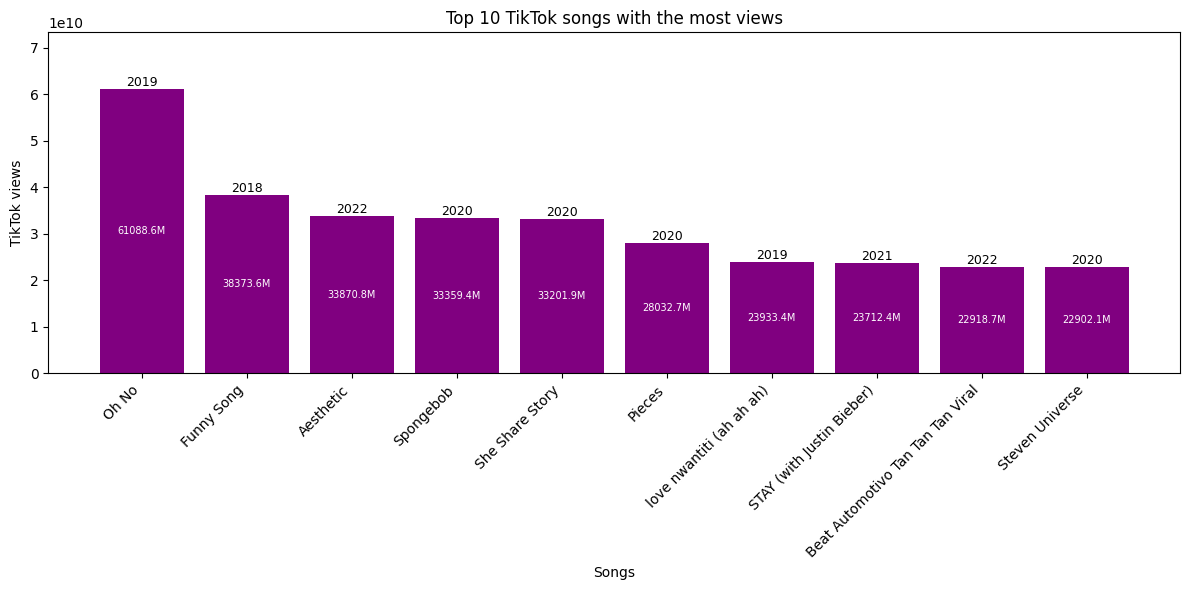

In [415]:
top_tiktok = top_tiktok.head(10)
tracks = top_tiktok["track"]
views = top_tiktok["tiktok_views"]
years = top_tiktok["release_year"]


x = np.arange(len(tracks))

plt.figure(figsize=(12, 6))
bars = plt.bar(x, views, color="purple")

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1e6, f"{years.iloc[i]}", 
            ha='center', va='bottom', fontsize=9, color='black')
    plt.text(bar.get_x() + bar.get_width()/2, height /2, f"{height / 1_000_000:.1f}M", 
            ha="center", va="center", fontsize=7, color="white")
plt.title("Top 10 TikTok songs with the most views")
plt.ylim(0, max(views) * 1.2) 
plt.xlabel("Songs")
plt.ylabel("TikTok views")
plt.xticks(x, tracks, rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [416]:
top_song_per_year = tiktok_after_2016.loc[tiktok_after_2016.groupby("release_year")["tiktok_views"].idxmax()] 
top_per_year = top_song_per_year[["track", "release_year","tiktok_views"]].sort_values(by="release_year")
top_per_year

,track,release_year,tiktok_views
550,Unstoppable,2016,"14,808,888,629"
1145,Infinity,2017,"22,241,102,823"
1547,Funny Song,2018,"38,373,644,011"
474,Oh No,2019,"61,088,562,861"
3377,Spongebob,2020,"33,359,398,879"
26,STAY (with Justin Bieber),2021,"23,712,377,029"
113,Aesthetic,2022,"33,870,791,454"
3,Flowers,2023,"14,603,725,994"
23,TEXAS HOLD 'EM,2024,"6,518,604,175"


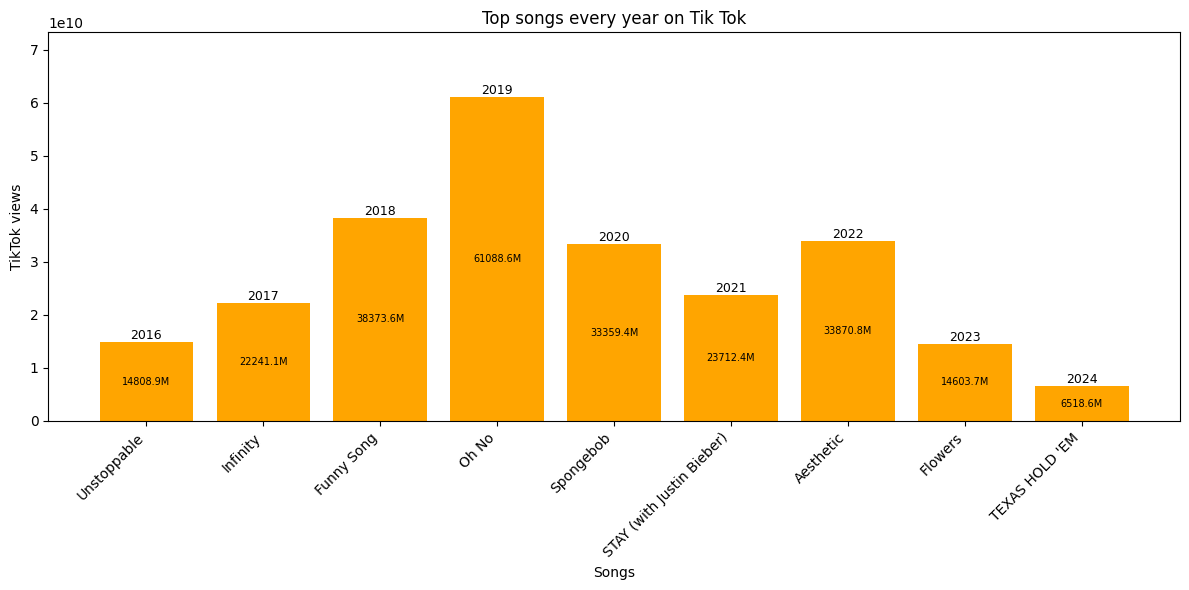

In [417]:
top_tracks = top_per_year["track"]
top_views = top_per_year["tiktok_views"]
top_years = top_per_year["release_year"]


x = np.arange(len(top_per_year))

plt.figure(figsize=(12, 6))
bars = plt.bar(x, top_views, color="orange")

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1e6, f"{top_years.iloc[i]}", 
            ha="center", va="bottom", fontsize=9, color="black")
    plt.text(bar.get_x() + bar.get_width()/2, height /2, f"{height / 1_000_000:.1f}M", 
            ha="center", va="center", fontsize=7, color="black")

plt.title("Top songs every year on Tik Tok")
plt.ylim(0, max(views) * 1.2) 
plt.xlabel("Songs")
plt.ylabel("TikTok views")
plt.xticks(x, top_tracks, rotation=45, ha="right")
plt.tight_layout()
plt.show()

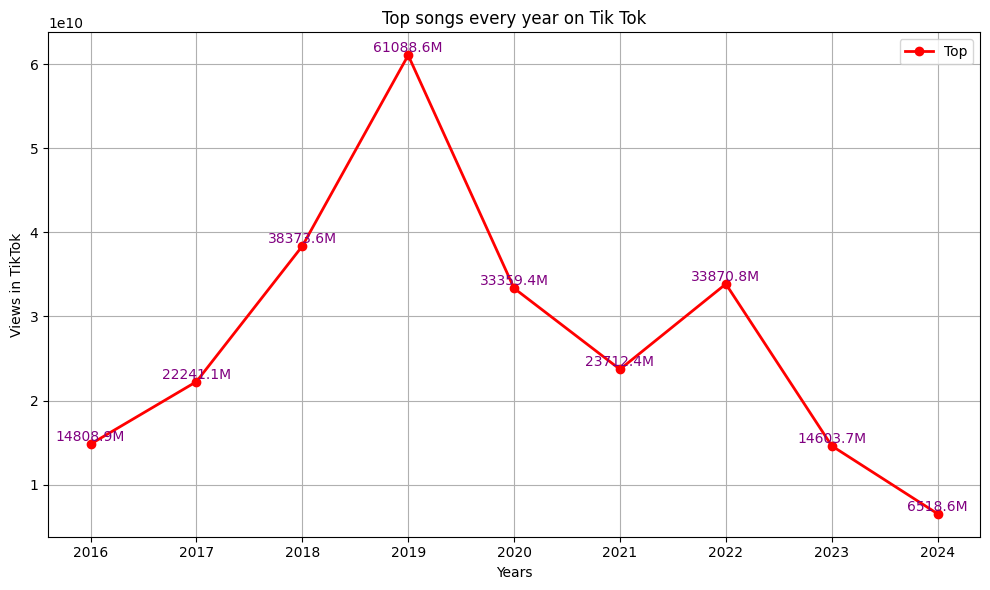

In [418]:
top_per_year_views = top_per_year["tiktok_views"]
top_per_year_to_years = top_per_year["release_year"]

plt.figure(figsize=(10, 6))
plt.plot(top_per_year_to_years, top_per_year_views, marker="o", linestyle="-", color="red", linewidth=2, label="Top")

for x, y in zip(top_per_year_to_years, top_per_year_views):
    plt.text(x, y + 300000, f"{y / 1_000_000:.1f}M", ha="center", va="bottom", color="purple")

plt.title("Top songs every year on Tik Tok")
plt.xlabel("Years")
plt.ylabel("Views in TikTok")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [419]:
average_per_year = (
    tiktok_after_2016.groupby("release_year")["tiktok_views"]
    .mean()
    .reset_index()
)
average_per_year


,release_year,tiktok_views
0,2016,"669,489,890"
1,2017,"898,777,599"
2,2018,"1,158,706,285"
3,2019,"1,345,429,094"
4,2020,"1,559,040,632"
5,2021,"1,660,993,430"
6,2022,"1,365,532,808"
7,2023,"513,336,556"
8,2024,"252,505,135"


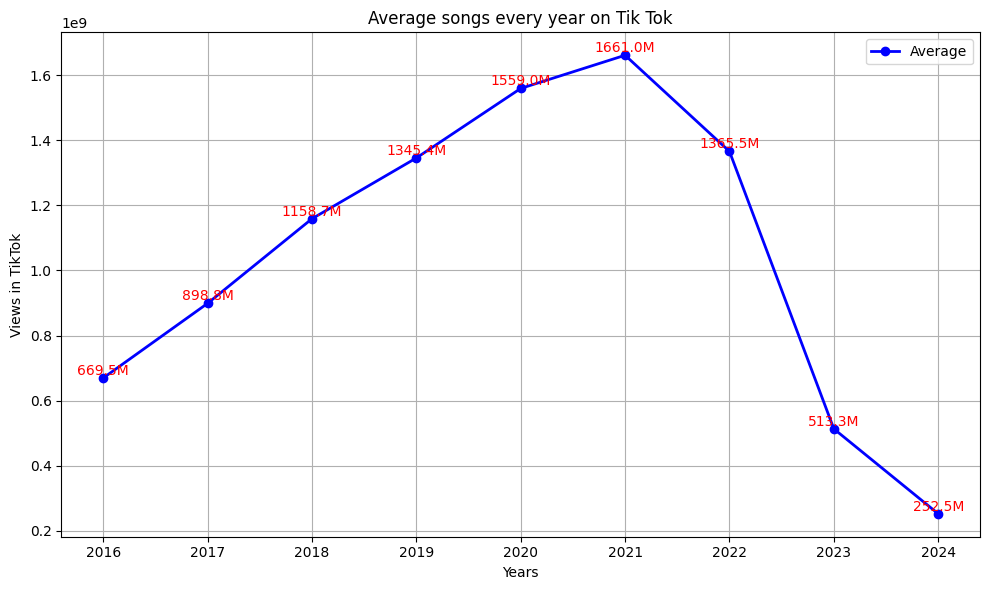

In [420]:
average_per_year_views = average_per_year["tiktok_views"]
average_per_year_to_years = average_per_year["release_year"]

plt.figure(figsize=(10, 6))
plt.plot(average_per_year_to_years, average_per_year_views, marker="o", linestyle="-", color="blue", linewidth=2, label="Average")

for x, y in zip(average_per_year_to_years, average_per_year_views):
    plt.text(x, y + 300000, f"{y / 1_000_000:.1f}M", ha="center", va="bottom", color="red")

plt.title("Average songs every year on Tik Tok")
plt.xlabel("Years")
plt.ylabel("Views in TikTok")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

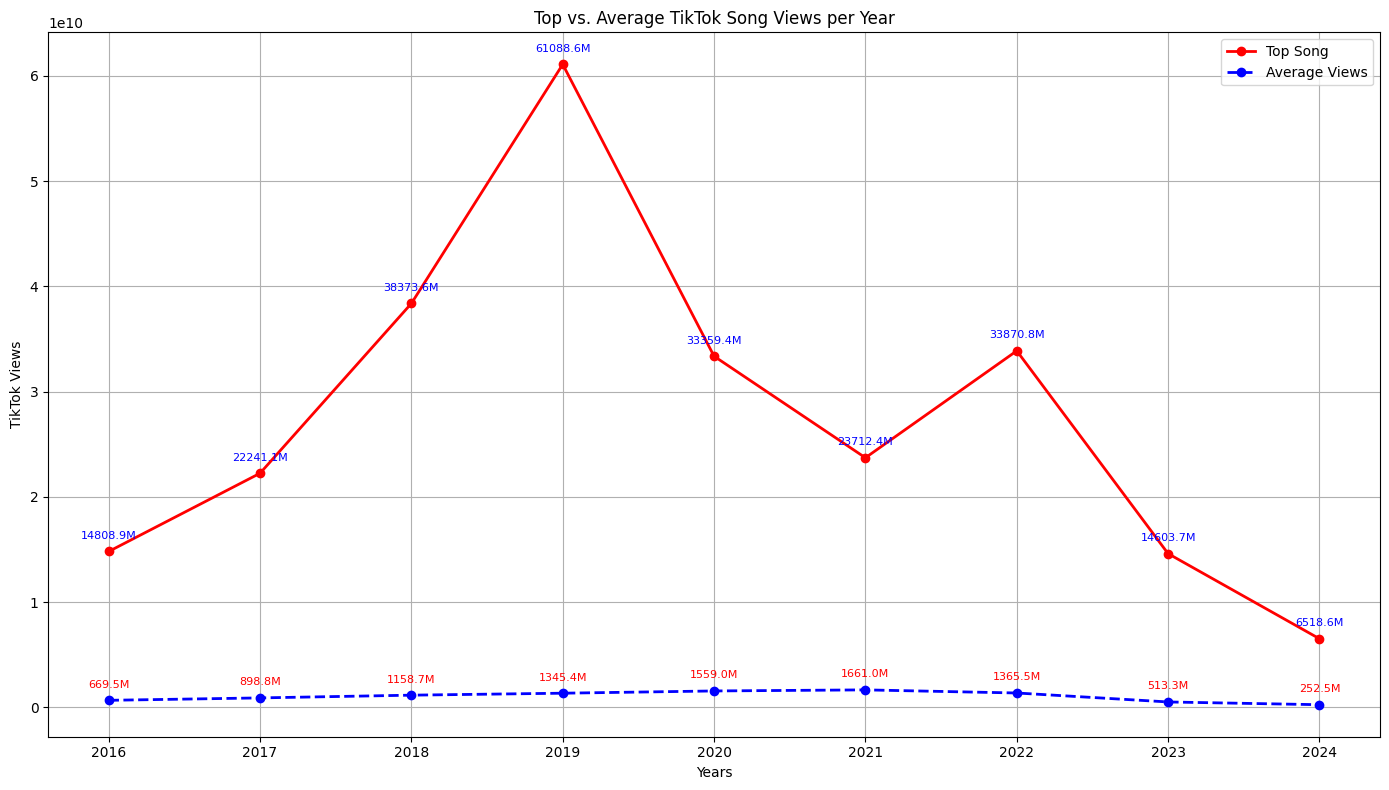

In [421]:
top_per_year_views = top_per_year["tiktok_views"]
top_per_year_to_years = top_per_year["release_year"]

average_per_year_views = average_per_year["tiktok_views"]
average_per_year_to_years = average_per_year["release_year"]

plt.figure(figsize=(14, 8))

plt.plot(top_per_year_to_years, top_per_year_views, marker="o", linestyle="-", color="red", linewidth=2, label="Top Song")

plt.plot(average_per_year_to_years, average_per_year_views, marker="o", linestyle="--", color="blue", linewidth=2, label="Average Views")


for x, y in zip(top_per_year_to_years, top_per_year_views):
    plt.text(x, y + 1000000000, f"{y / 1_000_000:.1f}M", ha="center", va="bottom", color="blue", fontsize=8)

for x, y in zip(average_per_year_to_years, average_per_year_views):
    plt.text(x, y + 1000000000, f"{y / 1_000_000:.1f}M", ha="center", va="bottom", color="red", fontsize=8)

plt.title("Top vs. Average TikTok Song Views per Year")
plt.xlabel("Years")
plt.ylabel("TikTok Views")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.